In [1]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale

Pretty printing has been turned OFF


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

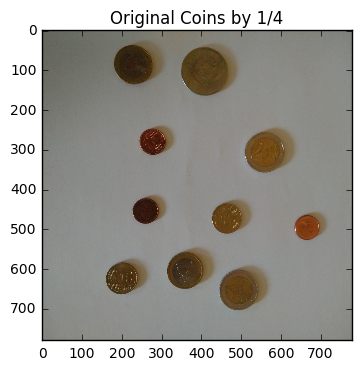

In [2]:
Path = './images/'
image_name = 'coins.jpg'
coins_im = imread(Path.__add__(image_name))
coins_im = img_as_ubyte(coins_im)
coins_im = rescale(coins_im,1/4)
plt.figure
plt.imshow(coins_im,cmap=plt.cm.gray)
plt.title('Original Coins by 1/4')
plt.show()

Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

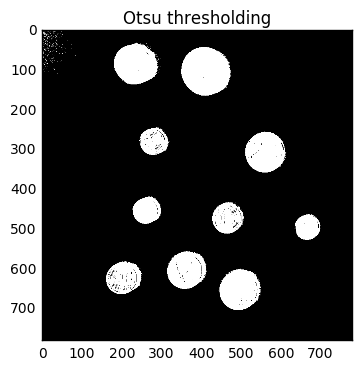

In [3]:
coins_im = rgb2gray(coins_im)

th = threshold_otsu(coins_im)

for n in range(0,coins_im.shape[0]):
    for k in range(0,coins_im.shape[1]):
        if coins_im[n,k] > th:
            coins_im[n,k]=0
        else:
            coins_im[n,k]=1
plt.figure
plt.imshow(coins_im,cmap=plt.cm.gray)
plt.title('Otsu thresholding')
plt.show()

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

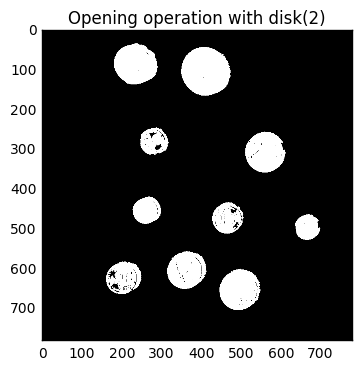

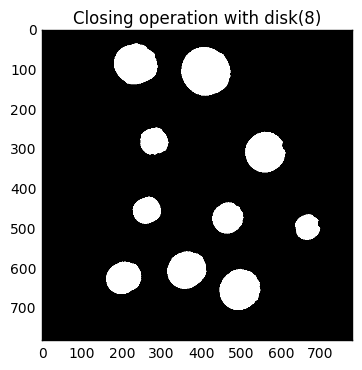

In [4]:
se=disk(2)
coins_im=binary_opening(coins_im,se)
plt.figure
plt.imshow(coins_im,cmap=plt.cm.gray)
plt.title('Opening operation with disk(2)')
plt.show()

se=disk(8)
coins_im=binary_closing(coins_im,se)
plt.figure
plt.imshow(coins_im,cmap=plt.cm.gray)
plt.title('Closing operation with disk(8)')
plt.show()



Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

we find the number of regions:10


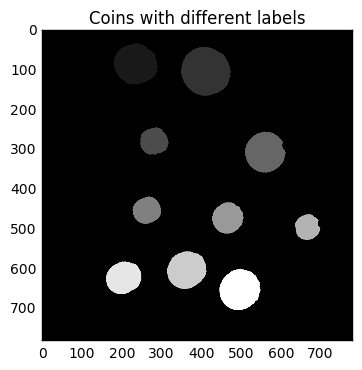

87.6774600987
radius0 is52.65131336229546
105.747292724
radius1 is61.3385918871016
281.10990753
radius2 is34.71027109092707
308.578349357
radius3 is50.491027702414414
454.457347861
radius4 is34.60924878857679
473.618327028
radius5 is38.91681434113635
496.607428754
radius6 is31.529062379842163
603.95320911
radius7 is48.02244397572414
623.543766578
radius8 is42.426906632104775
653.253136801
radius9 is51.11756895317634


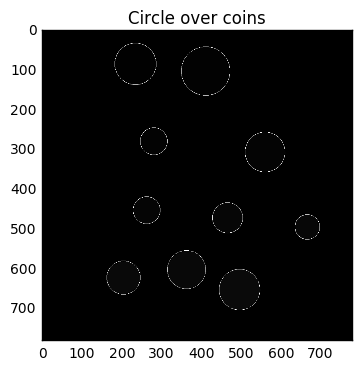

In [5]:
from skimage.draw import circle_perimeter

coins_im_L,num=label(coins_im, neighbors=None, background=None, return_num=True,connectivity=None)
print ('we find the number of regions:'+ str(num))  
plt.figure
plt.imshow(coins_im_L,cmap=plt.cm.gray)
plt.title('Coins with different labels')
plt.show()


props=regionprops(coins_im_L)

for i in range(len(props)):
    print (props[i].centroid[0])
    print ('radius'+str(i)+' is'+str(props[i].equivalent_diameter/2))
    circle_coord=circle_perimeter(int(props[i].centroid[0]),int(props[i].centroid[1]),int(props[i].equivalent_diameter/2))
    coins_im_L[circle_coord[0],circle_coord[1]]=255

plt.figure
plt.imshow(coins_im_L,cmap=plt.cm.gray)
plt.title('Circle over coins')
plt.show()




## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

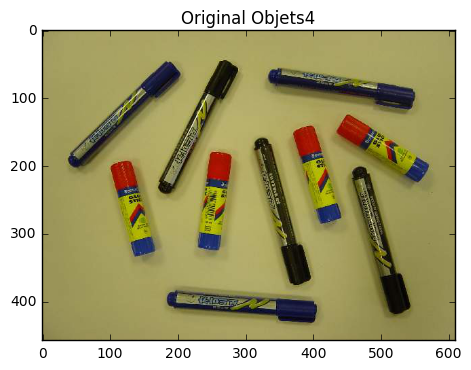

In [6]:
Path = './images/'
image_name = 'objets4.jpg'
objets4_im = imread(Path.__add__(image_name))
objets4_im = img_as_ubyte(objets4_im)

plt.figure
plt.imshow(objets4_im,cmap=plt.cm.gray)
plt.title('Original Objets4')
plt.show()



In [ ]:
objets4_im = rgb2gray(objets4_im)

th = threshold_otsu(objets4_im)

for n in range(0,objets4_im.shape[0]):
    for k in range(0,objets4_im.shape[1]):
        if objets4_im[n,k] > th:
            objets4_im[n,k]=0
        else:
            objets4_im[n,k]=1
plt.figure
plt.imshow(objets4_im,cmap=plt.cm.gray)
plt.title('Otsu thresholding')
plt.show()

se=disk(2)
objets4_im=binary_opening(objets4_im,se)
plt.figure
plt.imshow(objets4_im,cmap=plt.cm.gray)
plt.title('Opening operation with disk(2)')
plt.show()

se=disk(8)
objets4_im=binary_closing(objets4_im,se)
plt.figure
plt.imshow(objets4_im,cmap=plt.cm.gray)
plt.title('Closing operation with disk(8)')
plt.show()

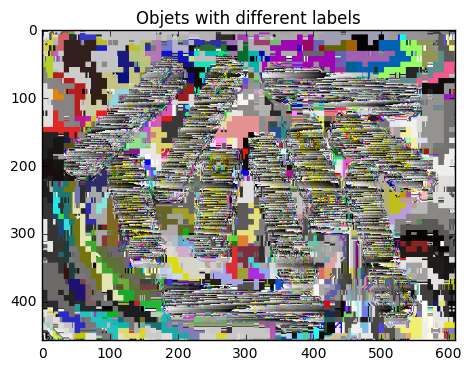

In [ ]:
objets4_im_L,num=label(objets4_im, neighbors=None, background=None, return_num=True,connectivity=None)
#print ('we find the number of regions:'+ str(num))  
plt.figure
plt.imshow(objets4_im_L,cmap=plt.cm.gray)
plt.title('Objets with different labels')
plt.show()

props=regionprops(objets4_im_L)
markers=0
glue=0
for i in range(len(props)):
    if props[i].area > 600:
        markers=markers+1
    elif props[i].area < 450:
        print ('')
    else:
        glue=glue+1

print ('we find the number of markers:'+ str(markers)+','+'and the number of glues:'+str(glue)) 



        